<a href="https://colab.research.google.com/github/aarupach/Aaru/blob/main/diabetes_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

In [8]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [9]:
print("="*80)
print("DIABETES PREDICTION MODEL - MINI PROJECT")
print("="*80)

DIABETES PREDICTION MODEL - MINI PROJECT


In [10]:
print("\n" + "="*80)
print("STEP 1: DATA LOADING")
print("="*80)


STEP 1: DATA LOADING


In [11]:
# Load the Pima Indians Diabetes Dataset from URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [13]:
df = pd.read_csv(url, names=column_names)
print("✅ Dataset loaded successfully from URL!")

✅ Dataset loaded successfully from URL!


In [14]:
print(f"\nDataset Shape: {df.shape}")
print(f"Total Samples: {df.shape[0]}")
print(f"Total Features: {df.shape[1] - 1}")

print("\n" + "-"*80)
print("First 5 Rows of Dataset:")
print("-"*80)
print(df.head())

print("\n" + "-"*80)
print("Dataset Information:")
print("-"*80)
df.info()

print("\n" + "-"*80)
print("Statistical Summary:")
print("-"*80)
print(df.describe())

print("\n" + "-"*80)
print("Missing Values Check:")
print("-"*80)
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

print("\n" + "-"*80)
print("Target Variable Distribution:")
print("-"*80)
print(df['Outcome'].value_counts())
print(f"\nDiabetes Cases: {df['Outcome'].sum()} ({df['Outcome'].mean()*100:.1f}%)")
print(f"Non-Diabetes Cases: {(df['Outcome']==0).sum()} ({(1-df['Outcome'].mean())*100:.1f}%)")



Dataset Shape: (768, 9)
Total Samples: 768
Total Features: 8

--------------------------------------------------------------------------------
First 5 Rows of Dataset:
--------------------------------------------------------------------------------
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

----------------------------------------------------

In [15]:
print("\n" + "="*80)
print("STEP 2: DATA PREPROCESSING")
print("="*80)

# Check for zeros (which represent missing values in this dataset)
print("\nZero Values Analysis (Zeros represent missing data):")
print("-"*80)
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    print(f"{col:20s}: {zero_count:3d} zeros ({zero_pct:.1f}%)")

# Replace zeros with NaN for specific columns
print("\n✓ Replacing zeros with NaN for medical impossibility columns...")
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Fill missing values with median
print("✓ Filling missing values with median...")
df.fillna(df.median(), inplace=True)

# Verify no missing values remain
print(f"✓ Missing values after preprocessing: {df.isnull().sum().sum()}")

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(f"\n✓ Feature Matrix Shape: {X.shape}")
print(f"✓ Target Vector Shape: {y.shape}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Training Set Size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"✓ Testing Set Size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Features scaled using StandardScaler")
print("✓ Data preprocessing completed successfully!")


STEP 2: DATA PREPROCESSING

Zero Values Analysis (Zeros represent missing data):
--------------------------------------------------------------------------------
Glucose             :   5 zeros (0.7%)
BloodPressure       :  35 zeros (4.6%)
SkinThickness       : 227 zeros (29.6%)
Insulin             : 374 zeros (48.7%)
BMI                 :  11 zeros (1.4%)

✓ Replacing zeros with NaN for medical impossibility columns...
✓ Filling missing values with median...
✓ Missing values after preprocessing: 0

✓ Feature Matrix Shape: (768, 8)
✓ Target Vector Shape: (768,)

✓ Training Set Size: 614 samples (79.9%)
✓ Testing Set Size: 154 samples (20.1%)

✓ Features scaled using StandardScaler
✓ Data preprocessing completed successfully!


In [16]:
print("\n" + "="*80)
print("STEP 3: MODEL TRAINING")
print("="*80)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
}


STEP 3: MODEL TRAINING


In [17]:
# Train all models
trained_models = {}
print("\nTraining models...")
print("-"*80)

for name, model in models.items():
    print(f"\n➤ Training {name}...")
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        trained_models[name] = {'model': model, 'scaled': True}
    else:
        model.fit(X_train, y_train)
        trained_models[name] = {'model': model, 'scaled': False}
    print(f"  ✓ {name} training completed")

print("\n✓ All models trained successfully!")


Training models...
--------------------------------------------------------------------------------

➤ Training Logistic Regression...
  ✓ Logistic Regression training completed

➤ Training Decision Tree...
  ✓ Decision Tree training completed

➤ Training Random Forest...
  ✓ Random Forest training completed

✓ All models trained successfully!


In [18]:
print("\n" + "="*80)
print("STEP 4: MAKING PREDICTIONS")
print("="*80)

predictions = {}
probabilities = {}

for name, model_info in trained_models.items():
    model = model_info['model']
    if model_info['scaled']:
        pred = model.predict(X_test_scaled)
        prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        pred = model.predict(X_test)
        prob = model.predict_proba(X_test)[:, 1]

    predictions[name] = pred
    probabilities[name] = prob
    print(f"✓ {name}: Predictions completed")


STEP 4: MAKING PREDICTIONS
✓ Logistic Regression: Predictions completed
✓ Decision Tree: Predictions completed
✓ Random Forest: Predictions completed


In [19]:
print("\n" + "="*80)
print("STEP 5: MODEL EVALUATION")
print("="*80)

results = []

for name in models.keys():
    print(f"\n{'='*80}")
    print(f"MODEL: {name}")
    print(f"{'='*80}")

    y_pred = predictions[name]
    y_prob = probabilities[name]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n✓ Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"✓ ROC-AUC Score: {roc_auc:.4f}")

    print("\n" + "-"*80)
    print("Classification Report:")
    print("-"*80)
    print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

    print("-"*80)
    print("Confusion Matrix:")
    print("-"*80)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(f"\nTrue Negatives: {cm[0,0]}")
    print(f"False Positives: {cm[0,1]}")
    print(f"False Negatives: {cm[1,0]}")
    print(f"True Positives: {cm[1,1]}")

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc
    })



STEP 5: MODEL EVALUATION

MODEL: Logistic Regression

✓ Accuracy: 0.7078 (70.78%)
✓ ROC-AUC Score: 0.8130

--------------------------------------------------------------------------------
Classification Report:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

 No Diabetes       0.75      0.82      0.78       100
    Diabetes       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

--------------------------------------------------------------------------------
Confusion Matrix:
--------------------------------------------------------------------------------
[[82 18]
 [27 27]]

True Negatives: 82
False Positives: 18
False Negatives: 27
True Positives: 27

MODEL: Decision Tree

✓ Accuracy: 0.7597 (75.97%)
✓ ROC-AUC Score: 0.7622

--------------------------

In [20]:
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

results_df = pd.DataFrame(results)
print("\n" + results_df.to_string(index=False))

best_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"\n🏆 Best Model (by Accuracy): {best_model}")

# Feature Importance (Random Forest)
print("\n" + "="*80)
print("FEATURE IMPORTANCE ANALYSIS (Random Forest)")
print("="*80)

rf_model = trained_models['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + feature_importance.to_string(index=False))


MODEL COMPARISON SUMMARY

              Model  Accuracy  ROC-AUC
Logistic Regression  0.707792 0.812963
      Decision Tree  0.759740 0.762222
      Random Forest  0.740260 0.814444

🏆 Best Model (by Accuracy): Decision Tree

FEATURE IMPORTANCE ANALYSIS (Random Forest)

                 Feature  Importance
                 Glucose    0.382953
                     BMI    0.162874
                     Age    0.111800
                 Insulin    0.101291
DiabetesPedigreeFunction    0.084694
             Pregnancies    0.060723
           SkinThickness    0.053395
           BloodPressure    0.042270


In [21]:
print("\n" + "="*80)
print("STEP 6: GENERATING VISUALIZATIONS")
print("="*80)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))


STEP 6: GENERATING VISUALIZATIONS


<Figure size 2000x1200 with 0 Axes>

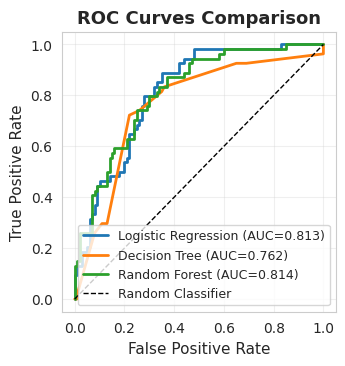

In [22]:
# 1. ROC Curves Comparison
ax1 = plt.subplot(2, 3, 1)
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, probabilities[name])
    auc_score = roc_auc_score(y_test, probabilities[name])
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('ROC Curves Comparison', fontsize=13, fontweight='bold')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True, alpha=0.3)

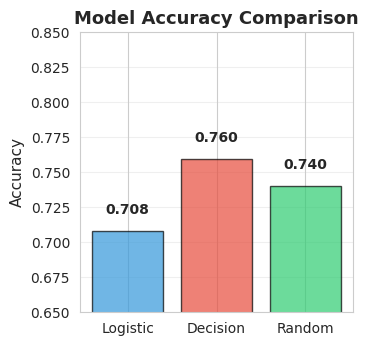

In [23]:
# 2. Model Accuracy Comparison
ax2 = plt.subplot(2, 3, 2)
models_short = [name.split()[0] if len(name.split()) > 1 else name for name in results_df['Model']]
bars = plt.bar(models_short, results_df['Accuracy'], color=['#3498db', '#e74c3c', '#2ecc71'],
               edgecolor='black', alpha=0.7)
plt.ylabel('Accuracy', fontsize=11)
plt.title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
plt.ylim([0.65, 0.85])
for i, (bar, val) in enumerate(zip(bars, results_df['Accuracy'])):
    plt.text(i, val + 0.01, f'{val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

Text(0.5, 394.72222222222223, 'Predicted')

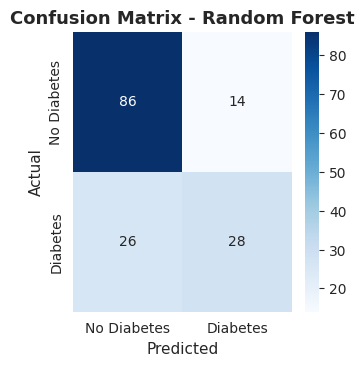

In [24]:
# 3. Confusion Matrix - Best Model (Random Forest)
ax3 = plt.subplot(2, 3, 3)
cm_rf = confusion_matrix(y_test, predictions['Random Forest'])
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Random Forest', fontsize=13, fontweight='bold')
plt.ylabel('Actual', fontsize=11)
plt.xlabel('Predicted', fontsize=11)


✓ Visualizations saved as 'diabetes_prediction_results.png'


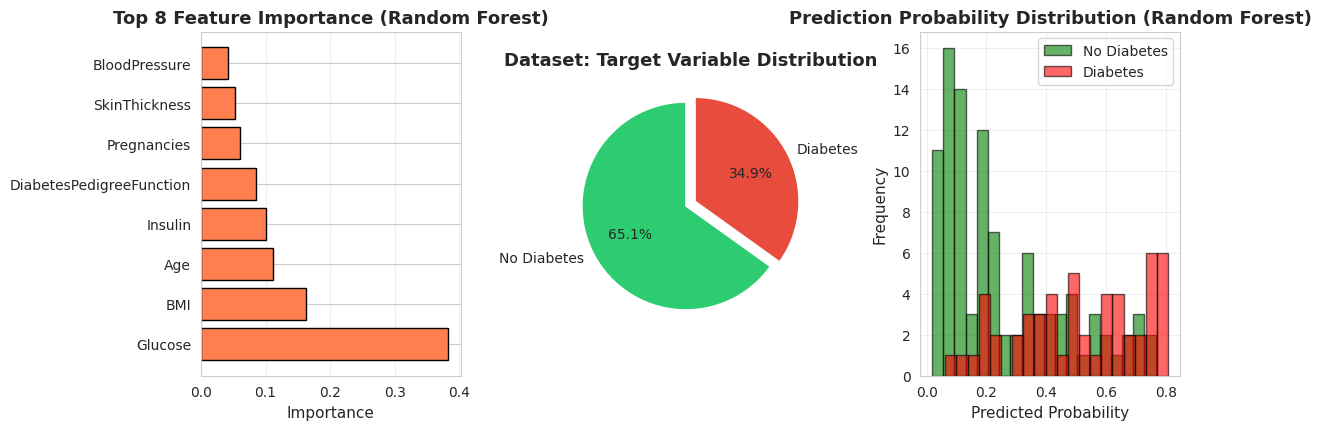

In [25]:
# 4. Feature Importance
ax4 = plt.subplot(2, 3, 4)
top_features = feature_importance.head(8)
plt.barh(range(len(top_features)), top_features['Importance'], color='coral', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance', fontsize=11)
plt.title('Top 8 Feature Importance (Random Forest)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# 5. Target Distribution
ax5 = plt.subplot(2, 3, 5)
outcome_counts = y.value_counts()
colors_pie = ['#2ecc71', '#e74c3c']
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%',
        startangle=90, colors=colors_pie, explode=[0.05, 0.05])
plt.title('Dataset: Target Variable Distribution', fontsize=13, fontweight='bold')

# 6. Prediction Probability Distribution
ax6 = plt.subplot(2, 3, 6)
rf_prob = probabilities['Random Forest']
plt.hist(rf_prob[y_test==0], bins=20, alpha=0.6, label='No Diabetes', color='green', edgecolor='black')
plt.hist(rf_prob[y_test==1], bins=20, alpha=0.6, label='Diabetes', color='red', edgecolor='black')
plt.xlabel('Predicted Probability', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Prediction Probability Distribution (Random Forest)', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('diabetes_prediction_results.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualizations saved as 'diabetes_prediction_results.png'")
plt.show()


In [26]:
print("\n" + "="*80)
print("EXAMPLE PREDICTION")
print("="*80)

# Select a sample from test set
sample_index = 0
sample_data = X_test.iloc[sample_index:sample_index+1]

print("\nSample Patient Data:")
print("-"*80)
for col in sample_data.columns:
    print(f"{col:25s}: {sample_data[col].values[0]:.2f}")

print("\n" + "-"*80)
print("Predictions from All Models:")
print("-"*80)

actual_outcome = "Diabetes" if y_test.iloc[sample_index] == 1 else "No Diabetes"
print(f"Actual Outcome: {actual_outcome}")
print()

for name, model_info in trained_models.items():
    model = model_info['model']
    if model_info['scaled']:
        sample_scaled = scaler.transform(sample_data)
        pred = model.predict(sample_scaled)[0]
        prob = model.predict_proba(sample_scaled)[0]
    else:
        pred = model.predict(sample_data)[0]
        prob = model.predict_proba(sample_data)[0]

    outcome = "Diabetes" if pred == 1 else "No Diabetes"
    confidence = prob[1] if pred == 1 else prob[0]

    print(f"{name:20s}: {outcome} (Confidence: {confidence:.2%})")


EXAMPLE PREDICTION

Sample Patient Data:
--------------------------------------------------------------------------------
Pregnancies              : 7.00
Glucose                  : 159.00
BloodPressure            : 64.00
SkinThickness            : 29.00
Insulin                  : 125.00
BMI                      : 27.40
DiabetesPedigreeFunction : 0.29
Age                      : 40.00

--------------------------------------------------------------------------------
Predictions from All Models:
--------------------------------------------------------------------------------
Actual Outcome: No Diabetes

Logistic Regression : Diabetes (Confidence: 60.97%)
Decision Tree       : Diabetes (Confidence: 90.11%)
Random Forest       : Diabetes (Confidence: 60.97%)


In [28]:
#PRINT SUMMARY
print("\n" + "="*80)
print("PROJECT COMPLETION SUMMARY")
print("="*80)

print("""
✅ STEP 1: Data Loading - Completed
   - Loaded Pima Indians Diabetes Dataset
   - Dataset shape: 768 samples, 8 features

✅ STEP 2: Data Preprocessing - Completed
   - Handled missing values (zeros replaced with median)
   - Train-test split (80-20)
   - Feature scaling applied

✅ STEP 3: Model Training - Completed
   - Logistic Regression
   - Decision Tree Classifier
   - Random Forest Classifier

✅ STEP 4: Model Evaluation - Completed
   - Accuracy scores calculated
   - ROC-AUC scores computed
   - Confusion matrices generated
   - Classification reports produced

✅ STEP 5: Visualizations - Completed
   - ROC curves comparison
   - Model accuracy comparison
   - Confusion matrices
   - Feature importance analysis
   - Prediction distributions

""")

print("="*80)
print("DIABETES PREDICTION MODEL - PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)

print(f"\n📊 Best Performing Model: {best_model}")
print(f"🎯 Accuracy: {results_df.loc[results_df['Model']==best_model, 'Accuracy'].values[0]:.4f}")
print(f"📈 ROC-AUC: {results_df.loc[results_df['Model']==best_model, 'ROC-AUC'].values[0]:.4f}")

print("\n" + "="*80)
print("Thank you for reviewing this project!")
print("="*80)


PROJECT COMPLETION SUMMARY

✅ STEP 1: Data Loading - Completed
   - Loaded Pima Indians Diabetes Dataset
   - Dataset shape: 768 samples, 8 features

✅ STEP 2: Data Preprocessing - Completed
   - Handled missing values (zeros replaced with median)
   - Train-test split (80-20)
   - Feature scaling applied

✅ STEP 3: Model Training - Completed
   - Logistic Regression
   - Decision Tree Classifier
   - Random Forest Classifier

✅ STEP 4: Model Evaluation - Completed
   - Accuracy scores calculated
   - ROC-AUC scores computed
   - Confusion matrices generated
   - Classification reports produced

✅ STEP 5: Visualizations - Completed
   - ROC curves comparison
   - Model accuracy comparison
   - Confusion matrices
   - Feature importance analysis
   - Prediction distributions


DIABETES PREDICTION MODEL - PROJECT COMPLETED SUCCESSFULLY!

📊 Best Performing Model: Decision Tree
🎯 Accuracy: 0.7597
📈 ROC-AUC: 0.7622

Thank you for reviewing this project!
